In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [43]:
ticker=['GFNORTEO.MX']
start,end='2014-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [7]:
ret=closes.pct_change().dropna()

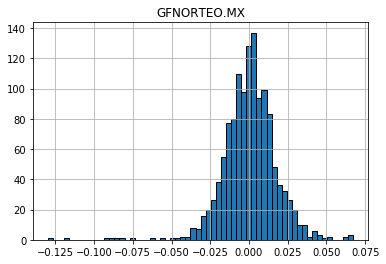

In [8]:
plt.title('GFNORTEO.MX')
plt.hist(ret['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [11]:
a2014=ret.iloc[0:250,]
a2015=ret.iloc[250:501,]
a2016=ret.iloc[501:753,]
a2017=ret.iloc[753:1004,]
a2018=ret.iloc[1004:1255,]

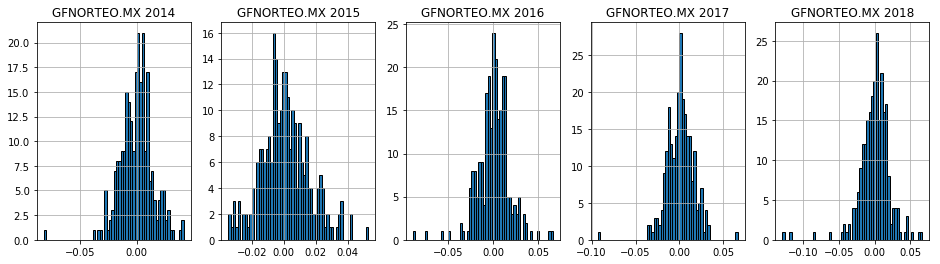

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(151)
plt.title('GFNORTEO.MX 2014')
plt.hist(a2014['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(152)
plt.title('GFNORTEO.MX 2015')
plt.hist(a2015['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(153)
plt.title('GFNORTEO.MX 2016')
plt.hist(a2016['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(154)
plt.title('GFNORTEO.MX 2017')
plt.hist(a2017['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(155)
plt.title('GFNORTEO.MX 2018')
plt.hist(a2018['GFNORTEO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()


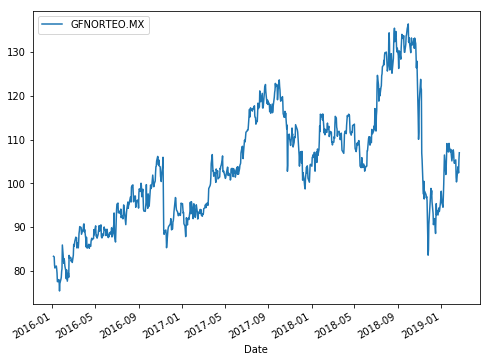

In [28]:
p1618=closes.iloc[502:1293,]
p1618.plot(figsize=(8,6))

### Cambios en los precios


<div class=text-justify> El aumento en el recio parece constante hasta finales del 2016 o inicios 2017, donde se ve una caida de 105 a 85 aproximadamente, se manntiene unos meses en el rango de 85 a 95, hasta que nicia un crecimeinto en vertical, se mantiene con un precio constante de aproximadamente 102, para después iniciar otra pendiente casi vertical. A finales del 2017 inicia a caer el precio hasta enero del 2018, cuando vuelve a subir. En julio 2018 inicia una alza en el precio sobrepasando los 130, para llegar a una baja muy marcada hasta 80 en picada. Inicia a recuperarse hasta la fecha.  </div>

In [29]:
ret16=p1618.pct_change().dropna()

In [30]:
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret16]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['GFNORTEO.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['GFNORTEO.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['GFNORTEO.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['GFNORTEO.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.000559696,0.000478819,-9.98367e-05,0.000489977
Rend anual,0.141043,0.120662,-0.0251589,0.123474
Vol diaria,0.0179481,0.0154904,0.0217838,0.0185427
Vol anual,0.284917,0.245902,0.345807,0.294356


### Discusión datos tabla 


<div class=text-justify> Se puede observar que el mayor rendimiento anual se da en el 2016, el peor en el 2018, y como se ve en la gráfica de los precios, hay una caida casi al final del 2018, por lo que tiene sentido que su rendimiento diario y anual sea negativo. La volatilidad anual se mantiene entre .24 y .34, siendo ésta ultima mayor por la misma caida en el precio. </div>

In [34]:
ret18=ret.iloc[1004:1293,]
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=ret18.mean()
ret_sum.loc['Volatility']=ret18.std()
ret_sum

,GFNORTEO.MX
Mean,0.000320025
Volatility,0.0214133


In [73]:
n=1000
for x in range (0,3):
    mu= ret_sum['GFNORTEO.MX']['Mean']
    sigma= ret_sum['GFNORTEO.MX']['Volatility']
    s0=107
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    107.006  107.171   107.58  112.536
liminf  100.405  87.5016  75.5195  38.9769
limsup  114.582  132.864  155.681  317.234
            st1     st10     st30    st252
Mean    107.021  107.239  107.739  113.512
liminf   98.548  82.4854  68.1791  28.9802
limsup  116.128  138.616  167.539  392.443
            st1     st10     st30    st252
Mean    107.003  107.177   107.62  113.007
liminf  96.4839  77.1448  60.7154  20.7094
limsup  117.461  143.709  178.344  470.374


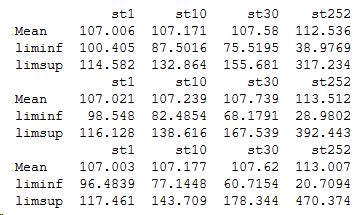

Este fue el resultado el dia 23 de febrero